In [29]:
import pandas as pd 
import numpy as np 
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download("stopwords")
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df = pd.read_csv("spam.csv", encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
df.shape

(5572, 5)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [33]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)

In [34]:
df.sample(5)

,v1,v2
3450,ham,Yes we were outside for like 2 hours. And I ca...
2010,ham,Dunno lei... I thk mum lazy to go out... I nev...
860,ham,In work now. Going have in few min.
910,ham,My love ! How come it took you so long to leav...
3583,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...


In [35]:
df.rename(columns={"v1":"target","v2":"text"}, inplace=True)
df.sample(5)

,target,text
3368,ham,Sorry i've not gone to that place. I.ll do so ...
5545,ham,Hi its in durban are you still on this number
2903,ham,HI DARLIN I HOPE YOU HAD A NICE NIGHT I WISH I...
4071,spam,Loans for any purpose even if you have Bad Cre...
790,ham,This is hoping you enjoyed your game yesterday...


In [36]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [37]:
df["target"] = en.fit_transform(df["target"])

In [38]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
df.duplicated().sum()

403

In [40]:
df = df.drop_duplicates(keep='first')

In [41]:
df.shape

(5169, 2)

In [42]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [43]:
port_stem = PorterStemmer()

In [44]:
def stemming(text):
    stammed_contant = re.sub('[^a-zA-Z]', ' ', text)
    stammed_contant = stammed_contant.lower()
    stammed_contant = stammed_contant.split()
    stammed_contant = [port_stem.stem(word) for word in stammed_contant if word not in stopwords.words('english')]
    stammed_contant = ' '.join(stammed_contant) 

    return stammed_contant

In [45]:
df["new_text"] = df["text"].apply(stemming)

In [46]:
df.head()

,target,text,new_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color="white")

In [51]:
spam = wc.generate(df[df['target'] == 1]["new_text"].str.cat(sep=" "))

In [53]:
import matplotlib.pyplot as plt

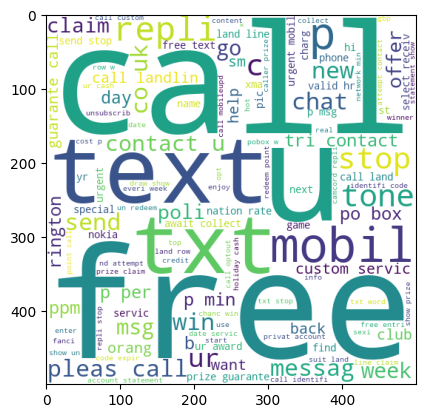

In [54]:
plt.imshow(spam)

In [58]:
ham = wc.generate(df[df['target'] == 0]["new_text"].str.cat(sep=" "))

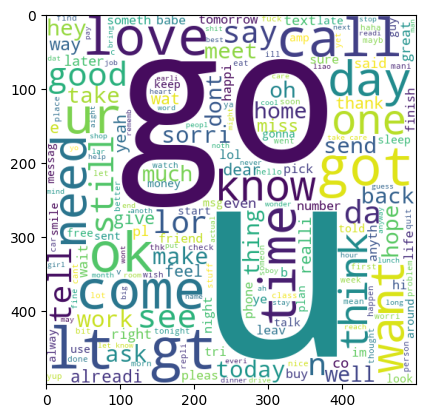

In [59]:
plt.imshow(ham)

In [103]:
cv = TfidfVectorizer()

In [104]:
X = cv.fit_transform(df["new_text"]).toarray()

In [105]:
X.shape

(5169, 6221)

In [106]:
y = df["target"].values

In [107]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=2)

In [109]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [110]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [111]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[794 109]
 [ 15 116]]
0.5155555555555555


In [112]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[903   0]
 [ 30 101]]
1.0


In [113]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9825918762088974
[[900   3]
 [ 15 116]]
0.9747899159663865


In [114]:
import pickle
pickle.dump(cv,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl", "wb"))